## Introduction to Scikit learn

### Practice of functions inside Scikit learning

##### We are going to cover
##### 1. End-to-end workflow
##### 2. Chosing the right algorithm for the problem
##### 3. Fit the model/Algorithm to make predictions on the data
##### 4. Evaluate the model
##### 5. Improve the model 
##### 6. Save and load the trainned model
##### 7. Put it all together

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [10]:
import pandas as pd
heart_disease = pd.read_csv('Data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


X = pd.DataFrame.drop("target", axis=1)
y = pd.DataFrame["target"]


X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                   Y,
                                                   test_size = 0.2)

# Try different ammounts of n_stimators
np.random.seed(42)
for i in range(10, 100, 10):
    print(f"Trying models with {i} stimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, Y_train)
    print(f"Model accuracy on test set : {clf.score(X_test, Y_test) * 100:.2f}%")

TypeError: super(type, obj): obj must be an instance or subtype of type

### 6. Save the model and save it

In [12]:
import pickle 

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

NameError: name 'clf' is not defined

In [13]:
loaded_model = pickle.load(open("random_forest_model_1.pkl", "rb"))

In [14]:
loaded_model.score(X_test, Y_test)

NameError: name 'X_test' is not defined

#1. Getting the data ready 

Three things to do :
    
    1. Split the data into features and labels ("X" & "Y")
    
    2. Imputting or disregarding missing values
    
    3. Converting non-numerical values to numerical values



In [17]:
X

NameError: name 'X' is not defined

In [16]:
y

NameError: name 'y' is not defined

In [36]:
# Machine learning principle : Never test models that haven't been splited into trainning and test data

In [37]:
# Split the data in trainning and testing
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2)

NameError: name 'X' is not defined

In [38]:
X.shape

NameError: name 'X' is not defined

In [39]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

NameError: name 'X_train' is not defined

### 1.1 Make sure all data is numerical 

In [40]:
car_sales = pd.read_csv("Data/car-sales-extended.csv")

In [41]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [42]:
len(car_sales)

1000

In [43]:
# X to predict price
X = car_sales.drop("Price", axis=1)

# Y Label
Y = car_sales["Price"]

X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                   Y,
                                                   test_size = 0.2)

In [44]:
# Value error : Sklearn cannot deal with strings 

In [45]:
# Turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([("one_hot", 
                                 one_hot, 
                                 categorical_features)],
                                 remainder="passthrough")
transformed_X = transformer.fit_transform(car_sales_missing)
transformed_X

NameError: name 'car_sales_missing' is not defined

In [46]:
pd.DataFrame(X)

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3
...,...,...,...,...
995,Toyota,Black,35820,4
996,Nissan,White,155144,3
997,Nissan,Blue,66604,4
998,Honda,White,215883,4


In [47]:
pd.DataFrame(transformed_X)

NameError: name 'transformed_X' is not defined

In [48]:
dummies = pd.get_dummies(car_sales[["Colour", "Make", "Doors"]])

In [49]:
dummies

,Doors,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota
0,4,0,0,0,0,1,0,1,0,0
1,5,0,1,0,0,0,1,0,0,0
2,4,0,0,0,0,1,0,1,0,0
3,4,0,0,0,0,1,0,0,0,1
4,3,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
995,4,1,0,0,0,0,0,0,0,1
996,3,0,0,0,0,1,0,0,1,0
997,4,0,1,0,0,0,0,0,1,0
998,4,0,0,0,0,1,0,1,0,0


In [50]:
# ALl the data is already numerical

In [51]:
# Refit the model

In [52]:
np.random.seed(42)
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                    Y,
                                                    test_size=0.2)

In [53]:
model.score(X_test, Y_test)

NameError: name 'model' is not defined

### 1.2 What if there were missing values ?

1. Fill them with some value
2. Remove the sample with missing values


In [ ]:
car_sales_missing = pd.read_csv("Data/car-sales-extended-missing-data.csv")
car_sales_missing

In [ ]:
car_sales_missing.isna().sum()

In [ ]:
# Convert data to numbers

### 1. Filling missing values with pd - INCOMPLETE SECTION

In [ ]:
# FIll the Make column
car_sales_missing["Make"].fillna("missing", inplace=True)


# Fill the Colour column
car_sales_missing["Colour"].fillna("missing", inplace=True)

# Fill the Odometer column
car_sales_missing["Odometer (KM)"].fillna("missing", inplace=True)

# FIll the Doors column
car_sales_missing["Doors"].fillna(4, inplace=True)

In [ ]:
car_sales_missing.head(10)

In [54]:
car_sales_missing.isna().sum()

NameError: name 'car_sales_missing' is not defined

In [ ]:
len(car_sales_missing)

### Option 2: Fill missing values with Scikit-learn

In [ ]:
car_missing_values = pd.read_csv("Data/car-sales-extended-missing-data.csv")
car_missing_values

In [ ]:
car_missing_values.isna().sum()

In [ ]:
X = car_sales_missing.drop("Price", axis=1)
Y = car_sales_missing["Price"]

In [ ]:
X.isna().sum()

In [55]:
# Fill missing values with Scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing & and numerical values with mean

cat_imputer = SimpleImputer(strategy="constant")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="constant")

# Define columns

cat_features = ["Make", "Colour"]
door_features = ["Doors"]
num_features = ["Odometer (KM)"]

# Creates an imputer (Something that fills missing data)

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_features", door_imputer, door_features),
    ("num_features", num_imputer, num_features)
])

filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4, 35431],
       ['BMW', 'Blue', 5, 192714],
       ['Honda', 'White', 4, 84714],
       ...,
       ['Nissan', 'Blue', 4, 66604],
       ['Honda', 'White', 4, 215883],
       ['Toyota', 'Blue', 4, 248360]], dtype=object)

In [56]:
# Get our transformed data array's back into DataFrame's
car_sales_filled = pd.DataFrame(filled_X, 
                                      columns=["Make", "Colour", "Doors", "Odometer (KM)"])

# Check missing data in training set
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [57]:
# Now we only have numeric data 

np.random.seed(41)
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(transformed_X,
                                                   Y,
                                                   test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

NameError: name 'transformed_X' is not defined

### 2. Choosing the right algorithm/estimator

Once you've got your data ready, the next step is to choose an appropriate machine learning algorithm or model to find patterns in your data.

Some things to note:

Sklearn refers to machine learning models and algorithms as estimators.
Classification problem - predicting a category (heart disease or not).
Sometimes you'll see clf (short for classifier) used as a classification estimator instance's variable name.
Regression problem - predicting a number (selling price of a car).
Unsupervised problem - clustering (grouping unlabelled samples with other similar unlabelled samples).
If you know what kind of problem you're working with, one of the next places you should look at is the Scikit-Learn algorithm cheatsheet.

2.1 Picking a machine learning model for regression

In [58]:
# Get california housing dataset

In [59]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [60]:
housing_df = pd.DataFrame(housing["data"])
housing_df

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [61]:
# Problem : Try to predict MedHouseVal

housing_df["target"] = housing["target"]
housing_df.head()

,0,1,2,3,4,5,6,7,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [62]:
# Import algorithm 

# Setup random seed
np.random.seed(42)

# Create the data
X = housing_df.drop("target", axis=1)
Y = housing_df["target"]

# Split into train and test sets 
X_train, X_test, Y_train, Y_test = train_test_split(X,
                                                   Y,
                                                   test_size=0.2)

# Instantiate and fit model (on the trainning set)

model = Ridge()
model.fit(X_train, Y_train)

# Check the score of the model

model.score(X_test, Y_test)

NameError: name 'Ridge' is not defined

In [ ]:
# Try the above method in the following models
# 1. Lasso
# 2. ElasticNet
# 3. SDGRegressor

In [ ]:
# import randomForesRegressor model class.

from sklearn.ensemble import RandomForestRegressor

# Setup random seed 
np.random.seed(42)

# Create the data 
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]
------------------
# Split into train and test sets
x_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Create random forest model
model = RandomForestRegressor()
model.fit(X_train, Y_train)

# Create the score of the model

model.score(X_test, Y_test)

### 2.2 Choosing an estimator for a classification problem 

In [ ]:
heart_disease = pd.read_csv("Data/heart-disease.csv")
heart_disease.head(10)

### LinearSVC for multiple classification 

In [63]:
# Import linearSVC estimator class

from sklearn.svm import LinearSVC

# Setup random seed
np.random.seed(42)

# Make the data 
X  = heart_disease.drop("target", axis=1)
Y = heart_disease["target"]

# Split the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate LinearSVC

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

# Evaluate the linearSVC 
clf.score(X_test, Y_test)

NameError: name 'heart_disease' is not defined

##### Notes: 

1. If you have unstructured data, use deep learning or transfer learning
2. If you have structured data, use ensemble methods

In [64]:
heart_disease

NameError: name 'heart_disease' is not defined

#### 3. Fit the algorithm with the data

In [47]:
# import randomForesRegressor model class.

from sklearn.ensemble import RandomForestClassifier

# Setup random seed 
np.random.seed(42)

# Create the data 
x = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split into train and test sets
x_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Create random forest model
model = RandomForestRegressor()

# Fit the data to the model 
model.fit(X_train, Y_train)

# Create the score of the model

model.score(X_test, Y_test)

0.5106393318965518

In [48]:
y.tail

<bound method NDFrame.tail of 0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64>

In [49]:
x.head

<bound method NDFrame.head of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0 

#### # 3.2 How to make predictions usign machine learning algorithms 

Two ways of make predictions 
1. prediction()
2. predict_prob()

In [50]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,69,1,2,140,254,0,0,146,0,2.0,1,3,3
104,50,1,2,129,196,0,1,163,0,0.0,2,0,2
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3


In [51]:
clf.predict(X_test)

NameError: name 'clf' is not defined

Why this output (1,0)?

In [52]:
clf.predict(X_test)

NameError: name 'clf' is not defined

In [53]:
# Compare predictions to truth label to evaluate the model

y_preds = clf.predict(X_test)
np.mean(y_preds == Y_test)

NameError: name 'clf' is not defined

In [54]:
clf.score(X_test, Y_test)

NameError: name 'clf' is not defined

In [55]:
from sklearn.metrics import accuracy_score 
accuracy_score(Y_test, y_preds)

NameError: name 'y_preds' is not defined

###### Predict_prob 

In [56]:
clf.predict_proba(X_test[:5])

NameError: name 'clf' is not defined

In [57]:
clf.predict(X_test)

NameError: name 'clf' is not defined

In [58]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [59]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# Create the data 

X = heart_disease.drop("age", axis=1)
y = heart_disease["age"]

# split into test / train

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

# create the model instance 
                                                    
model = RandomForestRegressor()

# fit the model with the data 

model.fit(X_train, y_train)

# make predictions 

y_preds = model.predict(X_test)

In [60]:
y_preds[:10]

array([57.84, 60.5 , 48.76, 60.78, 54.69, 44.29, 47.36, 61.1 , 61.94,
       57.35])

In [61]:
len(y_test)

61

In [62]:
len(y_preds)

61

In [63]:
# Compare predictions to the truth 

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

6.239672131147541

In [64]:
heart_disease["age"]

0      63
1      37
2      41
3      56
4      57
       ..
298    57
299    45
300    68
301    57
302    57
Name: age, Length: 303, dtype: int64

##### 4. Evaluating an algorithm

Three ways to evaluate Scikit learn estimators :
1. Estimators built in `score()` method
2. The scoring parameter
3. problem specific metric functions 

#### 4.1 Using the score() method

In [65]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed

X = heart_disease.drop("sex", axis=1)
y = heart_disease["sex"]

# Create train/test

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

# Create classifier algorithm instance 

model = RandomForestClassifier(n_estimators=100)

# Fit the algorithm with data

model.fit(X_train, y_train)


RandomForestClassifier()

In [66]:
y_preds

array([57.84, 60.5 , 48.76, 60.78, 54.69, 44.29, 47.36, 61.1 , 61.94,
       57.35, 57.49, 58.81, 51.32, 50.18, 43.58, 46.78, 42.24, 55.54,
       61.27, 55.13, 61.65, 50.72, 52.84, 62.38, 59.3 , 48.49, 65.64,
       50.82, 63.96, 49.33, 59.23, 58.05, 57.49, 55.28, 60.69, 59.22,
       53.23, 51.08, 45.84, 48.25, 56.27, 55.6 , 50.81, 51.62, 49.17,
       59.76, 49.51, 39.91, 62.9 , 62.  , 59.53, 61.64, 50.92, 51.62,
       56.93, 59.77, 61.42, 49.43, 59.7 , 61.43, 60.64])

In [67]:
clf.score(X_train , y_train)

NameError: name 'clf' is not defined

In [68]:
y_test.mean()

0.6557377049180327

In [69]:
X_test.mean()

age          53.754098
cp            0.901639
trestbps    129.901639
chol        238.196721
fbs           0.163934
restecg       0.491803
thalach     147.901639
exang         0.245902
oldpeak       1.001639
slope         1.393443
ca            0.901639
thal          2.196721
target        0.557377
dtype: float64

## 4.2 Evaluating a model using scoring parameter

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed

X = heart_disease.drop("sex", axis=1)
y = heart_disease["sex"]

# Create train/test

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2)

# Create classifier algorithm instance 

clf = RandomForestClassifier(n_estimators=100)

# Fit the algorithm with data

clf.fit(X_train, y_train);

In [19]:
clf.score(X_test, y_test)

0.7213114754098361

In [20]:
cross_val_score(clf, X, y, cv=15)

array([0.71428571, 0.61904762, 0.80952381, 0.8       , 0.85      ,
       0.65      , 0.75      , 0.7       , 0.7       , 0.8       ,
       0.8       , 0.8       , 0.7       , 0.7       , 0.65      ])

In [21]:
np.random.seed(42)

clf_single_score = clf.score(X_test, y_test)

clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

clf_single_score, clf_cross_val_score

(0.7213114754098361, 0.6998360655737704)

In [22]:
cross_val_score(clf, X, y, cv=5, scoring=None)

array([0.67213115, 0.68852459, 0.72131148, 0.75      , 0.68333333])

In [23]:
clf.score

<bound method ClassifierMixin.score of RandomForestClassifier()>

### 4.2.1 classification model evaluation metrics

1. accuracy
2. Area under ROC CURVE
3. confusion matrix
4. classification report

In [24]:
# Import cross_val_score from the model_selection module
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8524590163934426

In [25]:
np.mean(cross_val_score)

TypeError: unsupported operand type(s) for /: 'function' and 'int'

In [ ]:
print(f'Heart Disiease cross_validated predictor  accuracy: {np.mean(cross_val_score) *100:.2f}%')

### Area under the receiver operating characteristic curve  (AUC / ROC)

* ROC curves : Compares algorithm positive rate vs false positive rate 

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y , test_size=0.2)

In [ ]:
from sklearn.metrics import roc_curve

# Make predictions with probabilities
y_probs = clf.predict_proba(X_test)

# Keep the probabilites of the positive class only
y_probs = y_probs[:, 1]

# Calculate fpr, tpr and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Check the false positive rate
fpr

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_roc_curve(fpr, tpr):
    
    plt.plot(fpr, tpr, color="orange", label="roc")
    
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="guessing")
    
    plt.xlabel("False positive rate (fpr)")
    plt.ylabel("True positive rate(tpr)")
    plt.title("Receiver operating characteristic")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

### Confusion matrix

* Confusion matrix : Compare labels a model predict, and those supposed to have been predicted

In [ ]:
from sklearn.metrics import confusion_matrix 

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)


In [ ]:
# "Visualize confusion matrix with crosstab"

In [ ]:
pd.crosstab(y_test, y_preds, rownames=["Actual labels"], colnames=["predicted labels"])

In [ ]:
# make the confusion matrix more visual with seaborn()

import seaborn as sns

sns.set(font_scale=0.1)

conf_matrix = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_matrix)

In [ ]:
import sklearn 

sklearn.__version__


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, 
                                        y_pred=y_preds);

###  Problem  : Check later why confusion matrices doesn't work

### Clasification model

In [ ]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_preds))

In [ ]:

disease_true = np.zeros(10000)
disease_true[0] = 1  #o only positive zeroes

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

### 4.2 Regression model evaluation metrics 

1. R-squared
2. Mean absolute error
3. Mean squared error 


In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor 

np.random.seed(42)

X = heart_disease.drop("target", axis=1)

y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9)

model = RandomForestRegressor()

model.fit(X_train, y_train)

In [ ]:
model.score(X_test, y_test)

### Mean absolute error (MAE)

In [ ]:
from sklearn.metrics import mean_absolute_error 

y_preds = model.predict(X_test)
mae = mean_absolute_error
mae

In [ ]:
df = pd.DataFrame(data={"actual values": y_test, "predicted values" : y_preds })

df["differences"] = df["predicted values"] - df["actual values"]

df

In [ ]:
df = pd.DataFrame(data={"actual values": y_test, "predicted values": y_preds})

df["differences"] = df["predicted values"] - df["actual values"]
df

In [ ]:
np.abs(df["differences"].mean())

### Mean squared error

In [ ]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)

mse = mean_squared_error(y_preds, y_test)

mse

In [ ]:
squared = np.square(df["differences"])
squared.mean()

In [ ]:
df_large_error = df.copy()
df.iloc[0]["squared differences"] = 16

In [ ]:
df_large_error.head()

In [ ]:
df_large_error.iloc[:100] = 90
df_large_error

#### Finally using the scorer parameter 

In [136]:
from sklearn.model_selection  import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier(n_estimators=100)

In [137]:
np.random.seed(42)

# Different scores for 

cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [138]:
# Mean of cross validation accuracy 

print(f"The cross-validated is : {np.mean(cv_acc)*100:.2f}%")

The cross-validated is : 82.48%


In [139]:
np.random.seed(42)

cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [140]:
print(f"The cv_precision is : {np.mean(cv_precision)}")

The cv_precision is : 0.8329547346025924


In [141]:
cv_recall = cross_val_score(clf ,X, y, cv=5, scoring="recall")
cv_recall

array([0.87878788, 0.84848485, 0.78787879, 0.81818182, 0.87878788])

In [142]:
# Using in a regression algorithm 


from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

Heart_disease = pd.read_csv("Data/heart-disease.csv")
X = Heart_disease.drop("target", axis=1)
y = heart_disease["target"]

model = RandomForestRegressor(n_estimators=100)


In [143]:
# MAE 

cv_mae = cross_val_score(model, X, y, cv=3 , scoring="neg_mean_absolute_error")
cv_mae

array([-0.40188119, -0.27584158, -0.47821782])

In [144]:
# MSE

cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
cv_mse

array([-0.14617049, -0.22336557, -0.14107213, -0.161105  , -0.28671167])

In [145]:
cv_mae.mean()

-0.3853135313531353

In [146]:
cv_mse.mean()

-0.1916849726775956

### Evaluating a model using sklearn functions

* 3third  Way to evaluate sklearn functions

In [185]:
heart_disease.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [18]:
# Problem : Evaluate a classification algorithm with sklearn functions 

import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split 

np.random.seed(42)

# Import prepared data
heart_disease = pd.read_csv("Data/heart-disease.csv")

# Create X Y
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# Split data 
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2)

# create model
clf = RandomForestClassifier()

# Fit the model 

clf.fit(X_train, y_train)

# Make predictions 

y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions 

print("Classifier metrics on the test set")
print(f"Accuracy : {accuracy_score(y_test, clf.predict(X_test))*100:.2f}%")
print(f"Precision : {precision_score(y_test, y_preds)}")
print(f"Recall : {recall_score(y_test, y_preds)}")
print(f"F1 : {f1_score(y_test, y_preds)}")

Classifier metrics on the test set
Accuracy : 85.25%
Precision : 0.8484848484848485
Recall : 0.875
F1 : 0.8615384615384615


In [19]:
# Problem 2 : Evaluate a regression algorithm using sklearn functions 

import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 

np.random.seed(36)

# 1. Create data

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# 2. Split data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 3. Create model

model = RandomForestRegressor()

# 4. Fit model 

model.fit(X_train, y_train)

# 5. Predict model

y_preds = model.predict(X_test)

# 6. Evaluate model using evaluation functions 

print("Regression metrics on the test set")
print(f"R2 score : {r2_score(y_test, y_preds)}")
print(f"MAE : {mean_absolute_error(y_test, y_preds)}")
print(f"MSE : {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score : 0.4895612128146455
MAE : 0.24147540983606558
MSE : 0.11989344262295082


### 5. Improving an algorithm

* First predictions = baseline predictions.
* First algorithm = baseline algorithm.

* How do we improve algorithms and predictions?

DATA PERSPECTIVE : 
* 1. Collect more data
* 2. Improve data quality 

ALGORITHMIC PERSPECTIVE : 
* 1. Find a better algorithm
* 2. Improve current algorithm

Parameter vs Hyperparameters

1. Parameters = model find patterns in data
2. Hyperparameters = Settings on a model you can adjust to (Probabilistically) improve its ability to find patterns

Three ways to adjust hyperparameters :
1. By hand
2. Randomly with RandomSearchCV
3. Exaustively with GridSearchCV

In [20]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

In [21]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Tunning hyperparameters by hand

3 sets : Trainning, validation, test

In [22]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

* We will modify the following hyperparameters
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [23]:
def evaluate_preds(y_true, y_preds) :
    """
    Perform evaluation comparasion on y_true labels vs  y_preds labels
    """
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {
        "Accuracy" : round(accuracy, 2),
        "precision" : round(precision, 2),
        "recall" : round(recall, 2),
        "f1" : round(f1, 2)} 
    
    print(f"Acc : {accuracy * 100:.2f}%")
    print(f"Precision : {precision:.2f}")
    print(f"Recall : {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [24]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)


# shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X & Y

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split data

train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)


clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_preds = clf.predict(X_valid)

# Evaluate the classifier on evaluation metrics

baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc : 82.22%
Precision : 0.81
Recall : 0.88
F1 score: 0.85


{'Accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [25]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [26]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# Make predictions with different hyperparameters 

y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier 

clf_2_metrics = evaluate_preds(y_valid, y_preds_2)


Acc : 82.22%
Precision : 0.84
Recall : 0.84
F1 score: 0.84


clf_3 = RandomForestClassifier(n_estimators=100,
                              max_depth=10)

### 5.2 Tunning hyperparameters with RandomizedSearchCV

In [27]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators' : [10, 100 , 500, 1000, 1200, 1500],
       'max_depth' : [None, 5, 10, 20, 30], 
       'max_features' : ["auto", "sqrt"],
       "min_samples_split" : [2, 4, 6], 
       "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# split into X & Y

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV

rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter = 10,
                           cv=5,
                           verbose=2)

# Fit the randomizedSearchCV version of clf

rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500; total time=   3.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500; total time=   3.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500; total time=   3.8s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500; total time=   4.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1500; total time=   3.4s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [28]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 30}

In [29]:
# Make predictions with the best hyperparameters

rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions 

rs_metrics = evaluate_preds(y_test, rs_y_preds)

Acc : 83.61%
Precision : 0.76
Recall : 0.93
F1 score: 0.84


### 5.3 Hyperparameter tunning with GridSearchCV

* GridSearchCV : Make a brute - force combinatorics of the parameters in different algorithms

In [30]:
grid

{'n_estimators': [10, 100, 500, 1000, 1200, 1500],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [31]:
grid_search = 6*5*2*3*3*5

In [32]:
grid_search

2700

* 540 algorithms for the combination of parameters; too much for our current computing power

* How do we reduce the number of parameters?

In [33]:
grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

In [34]:
grid_search_2 = 3*1*2*1*2*5

In [35]:
grid_search_2

60

In [36]:
from sklearn.model_selection import GridSearchCV, train_test_split 

np.random.seed(42)

from sklearn.model_selection import RandomizedSearchCV

grid_2 = {'n_estimators': [100, 200, 500],
         'max_depth': [None],
         'max_features': ['auto', 'sqrt'],
         'min_samples_split': [6],
         'min_samples_leaf': [1, 2]}

np.random.seed(42)

# split into X & Y

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

# Split into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV

gs_clf = GridSearchCV(estimator=clf,
                           param_grid=grid_2,
                           cv=5,
                           verbose=2)

# Fit the GridSearchCV version of clf

gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.2s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, 

In [37]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [38]:
gs_y_preds = gs_clf.predict(X_test)

gs_metrics = evaluate_preds(y_test, gs_y_preds)

gs_metrics

Acc : 78.69%
Precision : 0.74
Recall : 0.82
F1 score: 0.78


{'Accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

In [39]:
compare_metrics = pd.DataFrame({"baseline" : baseline_metrics,
                              "clf_2" : clf_2_metrics,
                              "Random search": rs_metrics,
                              "grid search " : gs_metrics})
compare_metrics

,baseline,clf_2,Random search,grid search
Accuracy,0.82,0.82,0.84,0.79
precision,0.81,0.84,0.76,0.74
recall,0.88,0.84,0.93,0.82
f1,0.85,0.84,0.84,0.78


<AxesSubplot:>

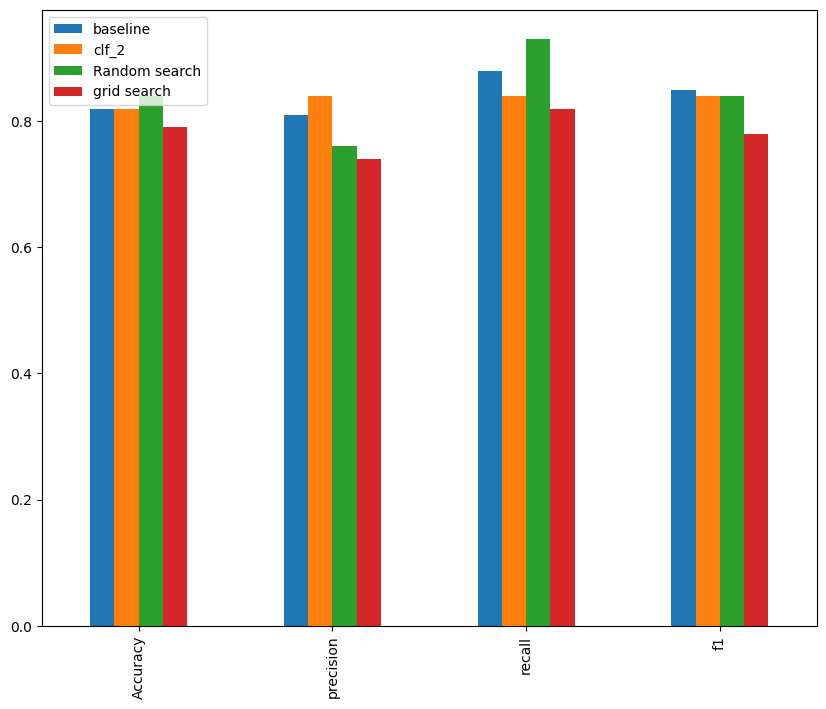

In [40]:
# plot of compared metrics 

compare_metrics.plot.bar(figsize=(10, 8))

### 6. Saving the model 

1. Using the pickel module
2. Using the joblib module 

In [ ]:
import pickle 

# Save an existing model to file
pickle.dump(gs_clf, open("gs_random_forest_model_1.pkl", "wb"))

In [ ]:
# Load a saved model

loaded_pickle_model = pickle.load(open("gs_random_forest_model_1.pkl", "rb"))

In [ ]:
# make some predictions

pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

In [ ]:
from joblib import load, dump

# Save model to file 

dump(gs_clf, filename="gs_random_forest_model_1.joblib")

In [ ]:
# Import a saved joblib model 

loaded_job_model = load(filename="gs_random_forest_model_1.joblib")

In [ ]:
loaded_job_model

In [ ]:
# make and evaluate joblib predictions 

joblib_y_preds = loaded_job_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

### 7. Putting it all together 

In [ ]:
data = pd.read_csv("Data/heart-disease.csv")
data

In [ ]:
data.dtypes

In [ ]:
data.isna().sum()

In [ ]:
# All data should be numeric and,
# There should be no missing values 

In [ ]:
# Getting data ready 
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, train_test_split


# Set up random seed

import numpy as np

np.random.seed(42)

# Import data and drop rows with missing values

data = pd.read_csv("Data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"], inplace=True)

# Define different features and transformer pipelines

categorical_features = ["Make", "Colour"]
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value="missing")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy='constant', fill_value=4)) 
])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy='mean'))
])


# Setup preprocessing steps (Fill missing values, then convert to numbers)

preprocessor = ColumnTransformer(
                    transformers=[
                     ("cat", categorical_transformer, categorical_features),
                     ("door", door_transformer, door_feature),
                     ("num", numeric_transformer, numeric_features)
                    ])

# Creating a preprocessign and modelling pipeline

model = Pipeline(steps=[("preprocessor" , preprocessor),
                        ("model" , RandomForestRegressor())])


# Split data X & Y 

X = data.drop("Price", axis=1)
y = data["Price"]
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y, 
                                                   test_size=0.2)

# Fit and score the model 

model.fit(X_train, y_train)
model.score(X_test, y_test)

##### Using GridSearchCV and RandomizedSearchCV with Pipeline

In [ ]:
# Use GridSearchCV with our regression pipelines
from sklearn.model_selection import GridSearchCV


pipe_grid = {
    "Preprocessor__num__imputer__strategy" : ["mean", "median"], 
    "model__n_estimators" : [100, 1000],
    "model__max_depth" : [None, 5],
    "model__max_features" : ["auto"],
    "model__min_samples_split" : [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2)

gs_model.fit(X_train, y_train)
